In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#데이터 불러오기!!


In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/kaggle/Harmful_Brain_Activity/Data/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/kaggle/Harmful_Brain_Activity/Data/test.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [ ]:
train_df['expert_consensus'].unique()

array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   spectrogram_id  1 non-null      int64
 1   eeg_id          1 non-null      int64
 2   patient_id      1 non-null      int64
dtypes: int64(3)
memory usage: 152.0 bytes


In [ ]:
import matplotlib.pyplot as plt

print('Train shape', train_df.shape)
display(train_df.head())

Train shape (106800, 15)


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [ ]:
train_df['expert_consensus'].value_counts()

Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: expert_consensus, dtype: int64

In [ ]:
lpd = train_df[train_df['expert_consensus']=='LPD'] # 뇌손상을 입은 후에 나타는 문제

lpd.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
277,736446371,0,0.0,10397461,0,0.0,2926135348,29441,LPD,0,1,0,0,0,0
278,688312769,0,0.0,10397461,1,528.0,2971910547,29441,LPD,0,1,0,0,0,0
279,1768958569,0,0.0,10397461,2,746.0,1943001855,29441,LPD,0,7,3,0,0,1
280,1768958569,1,4.0,10397461,3,750.0,1542266364,29441,LPD,0,7,3,0,0,1
281,1041252567,0,0.0,10397461,4,1250.0,914021164,29441,LPD,0,1,0,0,0,0


In [ ]:
lpd['spectrogram_id'].unique()

array([  10397461,   12916371,   12931383, ..., 2146414988, 2146798838,
       2147312808])

In [ ]:
import pandas as pd

# 기본 경로 설정
path = '/content/drive/MyDrive/kaggle/Harmful_Brain_Activity/train_spectrograms/'

# 'spectrogram_id'를 사용하여 특정 .parquet 파일의 경로를 구성
# 고유값 배열의 첫 번째 요소에 접근
file_path = path + str(lpd['spectrogram_id'].unique()[0]) + '.parquet'

# Parquet 파일 읽기
lpd_df = pd.read_parquet(file_path)

# 데이터 확인
print(lpd_df.head())


   time    LL_0.59    LL_0.78    LL_0.98    LL_1.17  LL_1.37  LL_1.56  \
0     1  18.959999  20.309999  18.209999  13.310000    13.61    11.53   
1     3  20.660000  21.760000  22.840000  17.780001    10.83    10.32   
2     5  15.750000  22.389999  20.639999  23.309999    11.21    10.47   
3     7  17.280001  18.629999  14.080000  13.350000    10.54     9.27   
4     9   9.490000  10.600000   9.970000   9.760000     8.75     6.73   

   LL_1.76  LL_1.95  LL_2.15  ...  RP_18.16  RP_18.36  RP_18.55  RP_18.75  \
0     7.12     8.76     5.02  ...      0.09      0.08      0.13      0.13   
1     8.33     5.51     4.80  ...      0.10      0.14      0.14      0.16   
2     9.75     9.20     7.93  ...      0.12      0.17      0.16      0.09   
3     6.81     6.12     6.11  ...      0.13      0.11      0.11      0.09   
4     6.02     4.81     3.71  ...      0.14      0.10      0.10      0.11   

   RP_18.95  RP_19.14  RP_19.34  RP_19.53  RP_19.73  RP_19.92  
0      0.15      0.14      0.12   

In [ ]:
lpd_df.columns

Index(['time', 'LL_0.59', 'LL_0.78', 'LL_0.98', 'LL_1.17', 'LL_1.37',
       'LL_1.56', 'LL_1.76', 'LL_1.95', 'LL_2.15',
       ...
       'RP_18.16', 'RP_18.36', 'RP_18.55', 'RP_18.75', 'RP_18.95', 'RP_19.14',
       'RP_19.34', 'RP_19.53', 'RP_19.73', 'RP_19.92'],
      dtype='object', length=401)

---

### 데이터 살펴보기

In [ ]:
unique_count = train_df['patient_id'].nunique()
print(unique_count)
print('---'* 8)
train_df['patient_id'].value_counts()


1950
------------------------


30631    2215
2641     2185
35627    1403
28330    1362
54199    1350
         ... 
7855        1
23451       1
24704       1
16282       1
38896       1
Name: patient_id, Length: 1950, dtype: int64

In [ ]:

patient_df = train_df[train_df['patient_id'] == 30631]

unique_expert_consensus = patient_df['expert_consensus'].unique()

print(unique_expert_consensus)

# 이 환자가 lpd를 가지고 있는 것은 뇌손상을 받았기 때문이다.
# 뇌손상이 있다면 ... 뇌가 작동을 안하지 않을까?


['Seizure' 'LRDA' 'LPD' 'Other' 'GRDA']


106800 info 데이터 셋의 로우의 수

1950 => 한명의 환자가 여러개의 row 들을 가지고 있다.

한명의 환자가 여러가지의 spectrogram_id를 가지고 있다.

In [ ]:

patient_df = train_df[train_df['patient_id'] == 54199]

unique_expert_consensus = patient_df['expert_consensus'].unique()

print(unique_expert_consensus)

#이 환자는 심각한 뇌손상을 받지 않았다.


['Seizure' 'GPD' 'Other']


In [ ]:
def consensus_types(group):
    consensus_values = group['expert_consensus'].unique()
    return ', '.join(consensus_values)

# 'patient_id'로 그룹화한 후 consensus_types 함수 적용
patients_consensus = train_df.groupby('patient_id').apply(consensus_types)

temp = []

# 결과 출력
for patient_id, consensus in patients_consensus.iteritems():
    temp.append({'환자': patient_id, '병명': consensus})
    print(f"환자 ID {patient_id}: {consensus}")
    print('---'*24)

# temp 리스트를 이용하여 데이터프레임 생성
temp_df = pd.DataFrame(temp)

# 데이터프레임 출력하여 확인
print(temp_df)

<ipython-input-37-44cba94926b0>:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for patient_id, consensus in patients_consensus.iteritems():


환자 ID 56: Other
------------------------------------------------------------------------
환자 ID 105: Other, GRDA, LPD
------------------------------------------------------------------------
환자 ID 149: GRDA
------------------------------------------------------------------------
환자 ID 195: GRDA, LRDA, Other, LPD
------------------------------------------------------------------------
환자 ID 198: Seizure, Other
------------------------------------------------------------------------
환자 ID 200: Seizure
------------------------------------------------------------------------
환자 ID 260: Seizure, Other
------------------------------------------------------------------------
환자 ID 282: Seizure, Other
------------------------------------------------------------------------
환자 ID 312: LPD, Other, Seizure
------------------------------------------------------------------------
환자 ID 345: LRDA, Seizure
------------------------------------------------------------------------
환자 ID 346: Seizure, GRD

In [ ]:
#'Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'

se = 0
gpd = 0
lrd = 0
oth = 0
grd = 0
lpd = 0


for i in range(len(temp_df)):
    if 'LPD' in temp_df['병명'][i]:
        lpd += 1
    elif 'Seizure' in temp_df['병명'][i]:
        se += 1
    elif 'GPD' in temp_df['병명'][i]:
        gpd += 1
    elif 'LRDA' in temp_df['병명'][i]:
        lrd += 1
    elif 'Other' in temp_df['병명'][i]:
        oth += 1
    elif 'GRDA' in temp_df['병명'][i]:
        grd += 1
    else:
        pass

print(se,gpd,lrd,oth,grd,lpd)

# 진단 유형을 별도 컬럼으로 분리
diagnosis_types = ['Seizure', 'Other', 'LRDA', 'GRDA', 'GPD', 'LPD']
for d in diagnosis_types:
    temp_df[d] = temp_df['병명'].apply(lambda x: d in x)

# '병명' 컬럼은 이제 필요 없으므로 삭제
temp_df.drop('병명'axis=1, inplace=True)

print(temp_df)

#발작이 가장 많음

834 78 134 436 217 251
         환자  Seizure  Other   LRDA   GRDA    GPD    LPD
0        56    False   True  False  False  False  False
1       105    False   True  False   True  False   True
2       149    False  False  False   True  False  False
3       195    False   True   True   True  False   True
4       198     True   True  False  False  False  False
...     ...      ...    ...    ...    ...    ...    ...
1945  65378    False   True  False   True   True  False
1946  65430     True   True  False  False  False  False
1947  65442     True   True  False  False  False  False
1948  65480    False   True  False  False  False  False
1949  65494     True  False  False  False  False  False

[1950 rows x 7 columns]


무조건 일어나는 것은 없음.

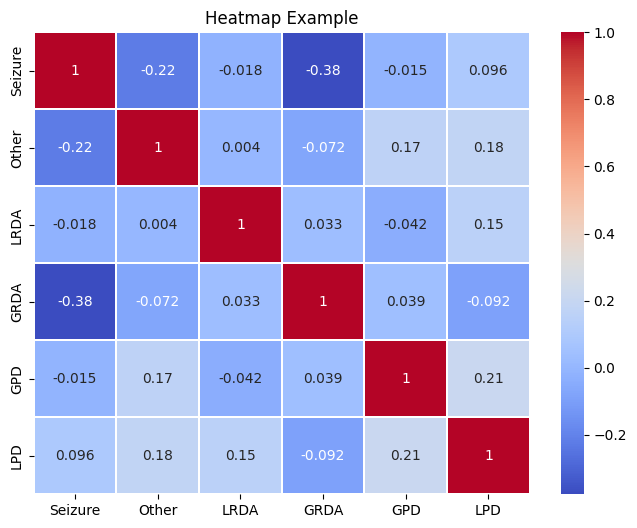

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

temp_cp = temp_df.copy()
temp_cp.drop('환자', axis=1, inplace=True)

# 'Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'
corr = temp_cp.corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))  # 그림 크기 설정
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.1)

# 제목 설정
plt.title('Heatmap Example')

# 플롯 보여주기
plt.show()

# 뇌파들 끼리는 상관을 찾아보기 힘들다. 잘 분리만 하면 종류를 찾아보기 쉬울 것 .

<ipython-input-54-3724e58fdfa5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


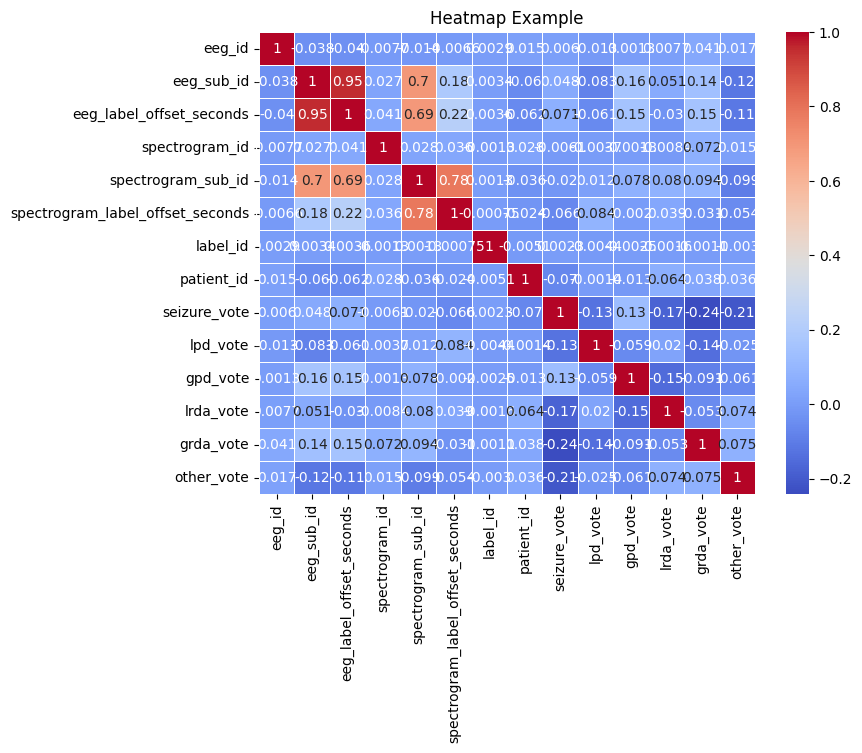

In [54]:

corr = train_df.corr()

# 히트맵 생성
plt.figure(figsize=(8, 6))  # 그림 크기 설정
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)

# 제목 설정
plt.title('Heatmap Example')

# 플롯 보여주기
plt.show()

#이건 그냥 해봄